# MySQL 실습 프로젝트

In [ ]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [ ]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import db_module as dm

In [ ]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 Aug 26 07:44 .
drwxr-xr-x 1 root root 4096 Aug 26 07:42 ..
drwxr-xr-x 4 root root 4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root 3671 Aug 26 07:43 db_module.py
-rw-r--r-- 1 root root  123 Aug 26 07:44 mysql.json
drwxr-xr-x 2 root root 4096 Aug 26 07:44 __pycache__
drwxr-xr-x 1 root root 4096 Aug 13 13:35 sample_data


## 월별 매출 & 이익

In [ ]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,37678000,3898760
02,32939000,2964970
03,39537000,3989990
04,40742000,4459160
05,25204000,1974760
06,21538000,2565910
07,46655000,5438360
08,25277000,2447010
09,27459000,3138820


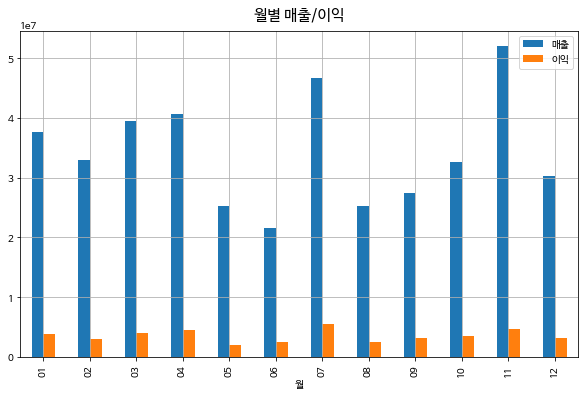

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15, y=1.02)
plt.grid()
plt.show()

## 거래처별 매출 & 이익

In [ ]:
results = dm.get_company_data(config)
df = pd.DataFrame(results, columns=['판매처','매출','이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
# df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익
판매처,,
국민은행,80405000,7690460
신한은행,62950000,6046140
기업은행,62501000,7147930
하나은행,118339000,11889890
우리은행,87787000,9457670


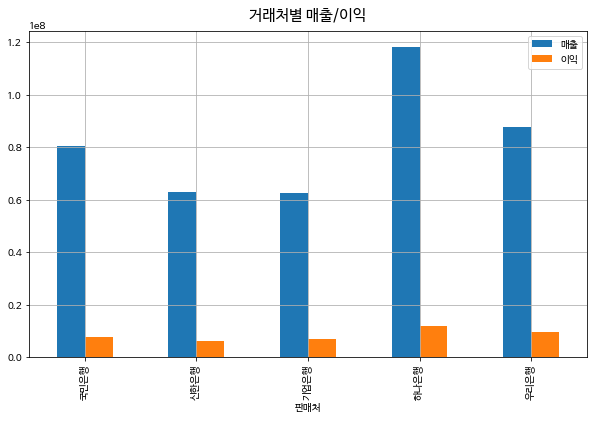

In [ ]:
# df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
df.plot.bar(figsize=(10,6))
plt.title('거래처별 매출/이익', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# df['이익율'].plot.barh(rot=0, figsize=(10,4))
# plt.title('거래처별 이익율(%)', size=15, y=1.02)
# plt.grid()
# plt.show()

## 거래처별 판매제품 & 수량

In [ ]:
# results = dm.get_comname_by_company(config)
# df = pd.DataFrame(results, columns=['판매처','상품','수량'])
# df.set_index(['판매처','상품'], inplace=True)
# df['수량'] = df.수량.astype(int)
# df

In [ ]:
# df.reset_index()['판매처'].unique()

In [ ]:
# for company in df.reset_index()['판매처'].unique():
#     sdf=df.loc[(company,)]
#     sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
#     plt.title(f'{company}에 판매된 상품', size=15, y=1.02)
#     plt.grid()
#     plt.show()

In [ ]:
# 신한은행
results = dm.get_company1_data(config)
df = pd.DataFrame(results, columns=['판매제품','수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df

,수량
판매제품,
스팀청소기,28
로봇청소기,29
얼음정수기,11
워시타워,7
짐볼,28
오븐,24
에어컨,7
압력밥솥,5
훌라후프,20


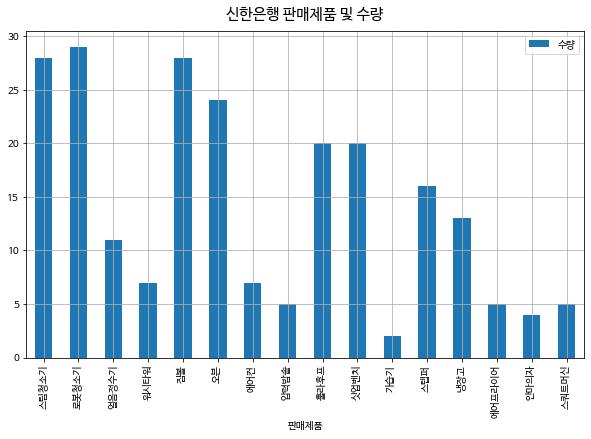

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('신한은행 판매제품 및 수량', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# 국민은행
results = dm.get_company2_data(config)
df = pd.DataFrame(results, columns=['판매제품','수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df

,수량
판매제품,
냉장고,35
세탁기,18
김치냉장고,26
스쿼트머신,30
로봇청소기,17
로잉머신,14
식기세척기,5
전기레인지,11
워시타워,5


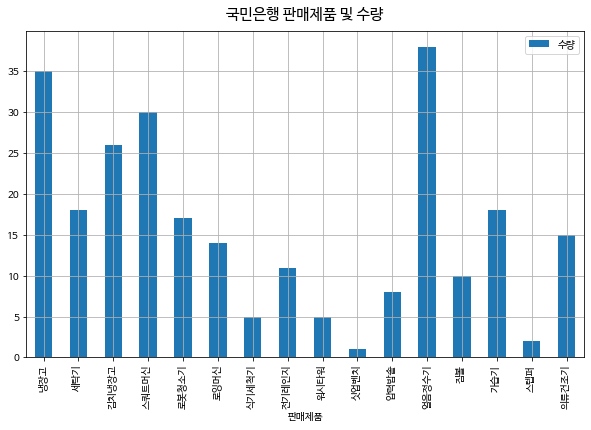

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('국민은행 판매제품 및 수량', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# 우리은행
results = dm.get_company3_data(config)
df = pd.DataFrame(results, columns=['판매제품','수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df

,수량
판매제품,
러닝머신,38
에어컨,25
전기레인지,21
가습기,13
정수기,7
사이클,2
전자레인지,28
워시타워,18
로봇청소기,17


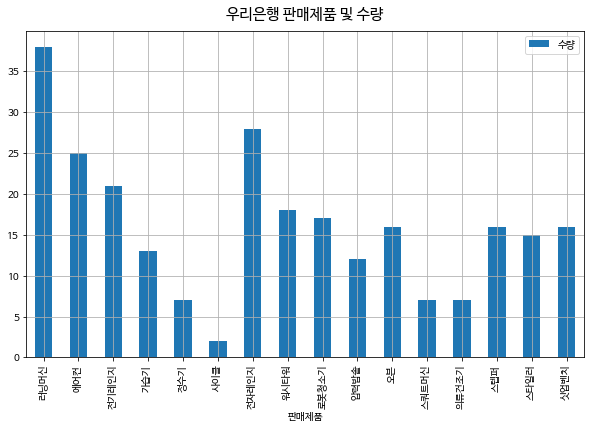

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('우리은행 판매제품 및 수량', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# 기업은행
results = dm.get_company4_data(config)
df = pd.DataFrame(results, columns=['판매제품','수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df

,수량
판매제품,
전기레인지,4
의류건조기,18
공기청정기,3
스타일러,38
전자레인지,23
짐볼,23
로잉머신,5
정수기,5
안마의자,17


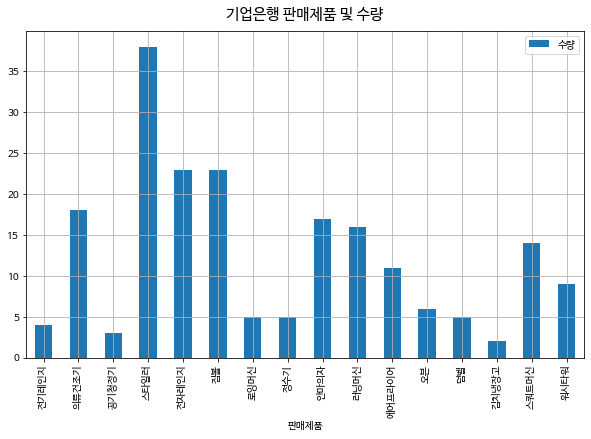

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('기업은행 판매제품 및 수량', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# 하나은행
results = dm.get_company5_data(config)
df = pd.DataFrame(results, columns=['판매제품','수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df

,수량
판매제품,
스타일러,34
세탁기,3
오븐,33
스텝퍼,17
에어프라이어,52
공기청정기,25
러닝머신,5
훌라후프,15
압력밥솥,16


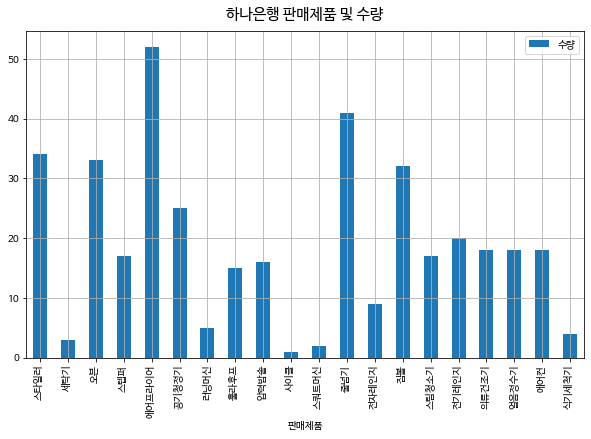

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('하나은행 판매제품 및 수량', size=15, y=1.02)
plt.grid()
plt.show()

## 제품별 판매수량 & 매출 & 이익

In [ ]:
results = dm.get_name_data(config)
df = pd.DataFrame(results, columns=['제품','판매수량','매출','이익'])
df.set_index('제품', inplace=True)
df['판매수량'] = df.판매수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,판매수량,매출,이익
제품,,,
냉장고,48,21312000,1491840
김치냉장고,28,7000000,1050000
식기세척기,9,3357000,167850
전자레인지,60,20340000,2847600
오븐,79,15958000,957480
전기레인지,56,23800000,1904000
정수기,12,5112000,562320
얼음정수기,67,24723000,2472300
에어프라이어,68,30056000,3005600


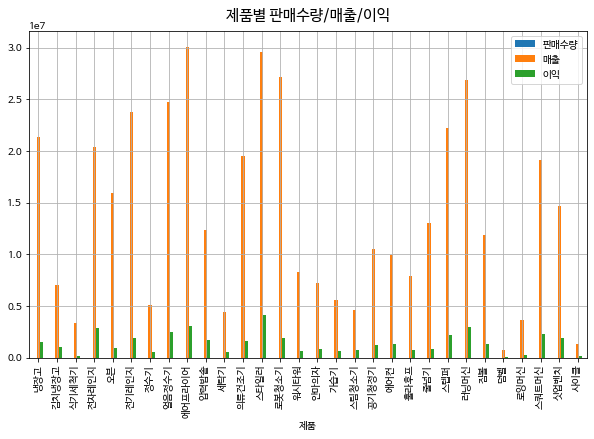

In [ ]:
# df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
df.plot.bar(figsize=(10,6))
# plt.title('제품별 매출/이익', size=15, y=1.02)
plt.title('제품별 판매수량/매출/이익', size=15, y=1.02)
plt.grid()
plt.show()

## 카테고리별 매출 & 이익

In [ ]:
results = dm.get_category_data(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
# df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익
카테고리,,
주방가전,164040000,16192470
생활가전,126809000,13446520
운동기구,121133000,12593100


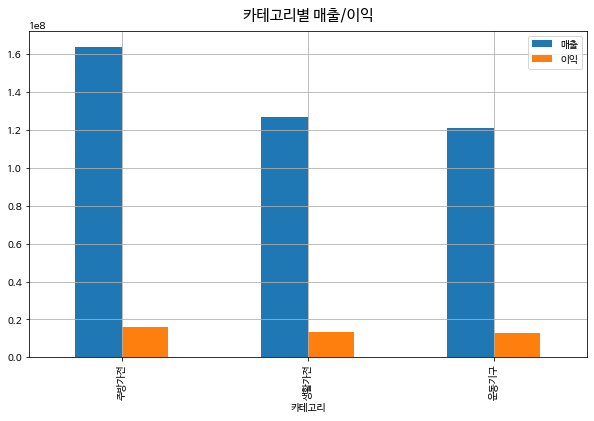

In [ ]:
# df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
df.plot.bar(figsize=(10,6))
plt.title('카테고리별 매출/이익', size=15, y=1.02)
plt.grid()
plt.show()

In [ ]:
# df['이익율'].plot.barh(rot=0, figsize=(10,4))
# plt.title('카테고리별 이익율(%)', size=15, y=1.02)
# plt.grid()
# plt.show()